In [7]:
# This Code places the V (vanadium) atoms into given W (Tungsten) supercell 
# by maximizing the average distance between V atoms considering periodic boundary conditions. 

from itertools import combinations
import numpy as np
import math
import datetime
import plotly.graph_objs as go
import random
import kaleido
from IPython.display import Image, display


# Read coordinates from the input file
coordinates = []
with open("/kaggle/input/coordinates-vanadium-disperse/coordinates.txt", "r") as file:
    for line in file:
        coords = list(map(float, line.split()))
        coordinates.append(coords)
    print("Coordinates are obtained total atoms:",len(coordinates))


# Print the coordinates
# for atom in coordinates:
#     print(atom)
    
# Convert coordinates to numpy array for easier manipulation
coordinates = np.array(coordinates)

#count number of atoms 
num_atoms = len(coordinates)
cell_lengths=[1,1,1]


# Precompute distances between all atoms for efficient lookup
all_distances = np.zeros((num_atoms, num_atoms))
for i in range(num_atoms):
    for j in range(i + 1, num_atoms):
        diff = coordinates[i] - coordinates[j]
        if cell_lengths is not None:
            diff -= np.round(diff / cell_lengths) * cell_lengths
        dist = np.linalg.norm(diff)
        all_distances[i, j] = dist
        all_distances[j, i] = dist


Coordinates are obtained total atoms: 128


In [3]:
def decorate_atoms(coordinates, num_selected):
    """
    Generates all possible selections of num_selected different atoms from given coordinates.

    Args:
    - coordinates (list): List of coordinate tuples, where each tuple represents the coordinates of an atom.
    - num_selected (int): Number of atoms to select in each pair.

    Returns:
    - pairs (generator): A generator yielding pairs of atom indices.
    """

    for atoms in combinations(range(len(coordinates)), num_selected):
        yield atoms

def calculate_avg_dist(atom_ids, verbose=0):
    """
    Calculates all distances between given atom IDs, considering periodic boundary conditions.

    Args:
    - atom_ids (list): List of atom IDs for which distances are to be calculated.
    - verbose (int, optional): If larger than 0, print all calculated coordinates and distances
    Returns:
    - average_distance (float): Average of all distances between the given atom IDs.
    """
    distances = []
    # Calculate distances between given atom IDs using precomputed distances
    for i in range(len(atom_ids)):
        for j in range(i + 1, len(atom_ids)):
            dist = all_distances[atom_ids[i], atom_ids[j]]
            distances.append(dist)

            if verbose > 1:
                print(f"Distance between atoms {atom_ids[i]} and {atom_ids[j]}: {dist:.4f}")

    # Calculate average distance
    if distances:
        average_distance = sum(distances) / len(distances)
    else:
        average_distance = 0.0

    return average_distance

In [4]:
# Plot supercell with V atoms and Vacancies 
def plot_atoms(vanadium=None,coordinates=coordinates,vacancy=None):
    # Generate two random indices
    # idx1, idx2 = random.sample(range(len(coordinates)), 2)
 
    # Extracting x, y, z coordinates
    x_coords, y_coords, z_coords = zip(*coordinates)
 
    # Create list of colors for all markers
    colors = ['gray'] * len(coordinates)
    # colors[idx1] = 'blue'
    # colors[idx2] = 'green'
 
    if vanadium is not None:
      for atom_id in vanadium:
          colors[atom_id] = 'red'
 
    if vacancy is not None:
      for atom_id in vacancy:
          colors[atom_id] = 'white'
 
    # Create trace
    trace = go.Scatter3d(
        x=x_coords,
        y=y_coords,
        z=z_coords,
        mode='markers',
        marker=dict(
            size=8,
            color=colors,
            symbol='circle',  # Marker symbol
            line=dict(color='rgb(0,0,0)', width=1)
        )
    )
 
    # Create layout
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='Z')
        ),
        title='3D Visualization of Atoms with Randomly Colored Atoms'
    )
 
    # Create figure
    fig = go.Figure(data=[trace], layout=layout)
    # Save figure
    fig.write_image("atoms_plot.png")
    # Show plot
    fig.show()

In [5]:
# Define number of V atom to be placed
num_selected = 3
# Generate all posible decorations of given number of Vs
decorator = decorate_atoms(coordinates, num_selected)

largest_dist=0
selected_atoms=[]
#define number of max composition from decorator
max_search= 341376 # 341376 possible cases for 3 V atoms

for i, atoms in enumerate(decorator):
    if i < max_search:
        atom_ids = list(atoms)
        # print(i,":",atom_ids)
        average_distance = calculate_avg_dist(atom_ids, verbose=0)
        if average_distance > largest_dist:
            largest_dist = average_distance
            selected_atoms = atom_ids
            print("V atoms in current best compositon ID:" + str(i) + ", Atoms:" + str(atom_ids))
            print("Average distance between the given atoms:", average_distance, "\n")
            # plot_atoms(atoms)
            with open("output.txt", "a") as file:
                file.write(str(i) + ":" + str(atom_ids) + "\n")
                file.write("Average distance between the given atoms:" + str(average_distance) + "\n")
    else:
        break

V atoms in current best compositon ID:0, Atoms:[0, 1, 2]
Average distance between the given atoms: 0.3333333333333333 

V atoms in current best compositon ID:4, Atoms:[0, 1, 6]
Average distance between the given atoms: 0.3875234616560737 

V atoms in current best compositon ID:6, Atoms:[0, 1, 8]
Average distance between the given atoms: 0.4363389981249825 

V atoms in current best compositon ID:8, Atoms:[0, 1, 10]
Average distance between the given atoms: 0.5053745918538316 

V atoms in current best compositon ID:24, Atoms:[0, 1, 26]
Average distance between the given atoms: 0.5374574785652648 

V atoms in current best compositon ID:38, Atoms:[0, 1, 40]
Average distance between the given atoms: 0.5690355937288492 

V atoms in current best compositon ID:40, Atoms:[0, 1, 42]
Average distance between the given atoms: 0.6220084679281462 

V atoms in current best compositon ID:163, Atoms:[0, 2, 40]
Average distance between the given atoms: 0.6910440616569954 

V atoms in current best compos

In [6]:
plot_atoms(vanadium=selected_atoms,coordinates=coordinates,vacancy=None)

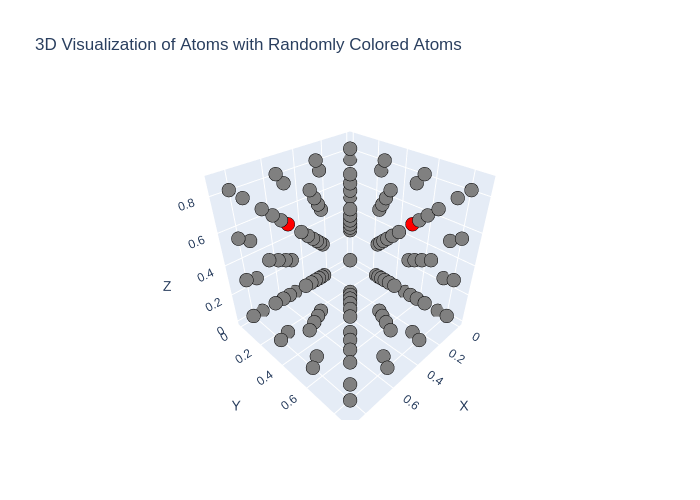

In [8]:
display(Image(filename='atoms_plot.png'))